In [7]:
#import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
a=np.load("mnist.npz")                   #loading the dataset and split it to train and test
test_x=np.array(a["x_test"])
test_y=np.array(a["y_test"])
train_x=np.array(a["x_train"])
train_y=np.array(a["y_train"])
print('X_train: ' + str(train_x.shape)) 
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_x.shape))
print('Y_test:  '  + str(test_y.shape))  #We can see that we have 60000 matrix that have 28 column and 28 row for train and 10000 for test 


X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


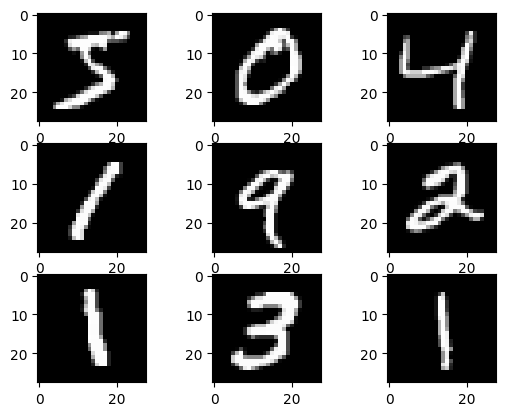

In [3]:
from matplotlib import pyplot                                    #we take a brief look to our data (imshow convrt a matrix to image and cmap is for the color of images)
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_x[i], cmap=pyplot.get_cmap('gray')) 
pyplot.show()


2


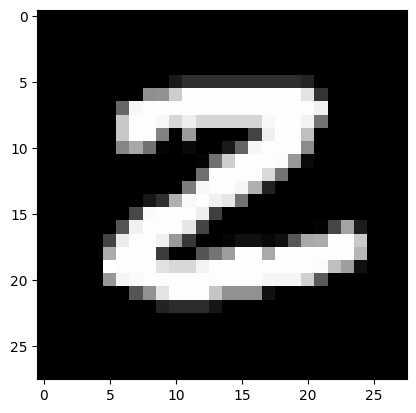

In [4]:
index=117            #for another  example we can see 3(train[111]) and its label :
img=train_x[index]
print(train_y[index])
plt.gray()
plt.imshow(img)

In [5]:
train_x = train_x.reshape((len(train_x), -1))
test_x= test_x.reshape((len(test_x), -1))

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_validation, y_train, y_validation = train_test_split(train_x,train_y, test_size=0.2, random_state=42)

In [8]:
# Initialize and train a KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [9]:
y_validation_pred = knn_classifier.predict(x_validation)

In [11]:
accuracy = accuracy_score(y_validation, y_validation_pred)
print(f"Accuracy on the validation set: {accuracy:.4f}")

Accuracy on the validation set: 0.9727


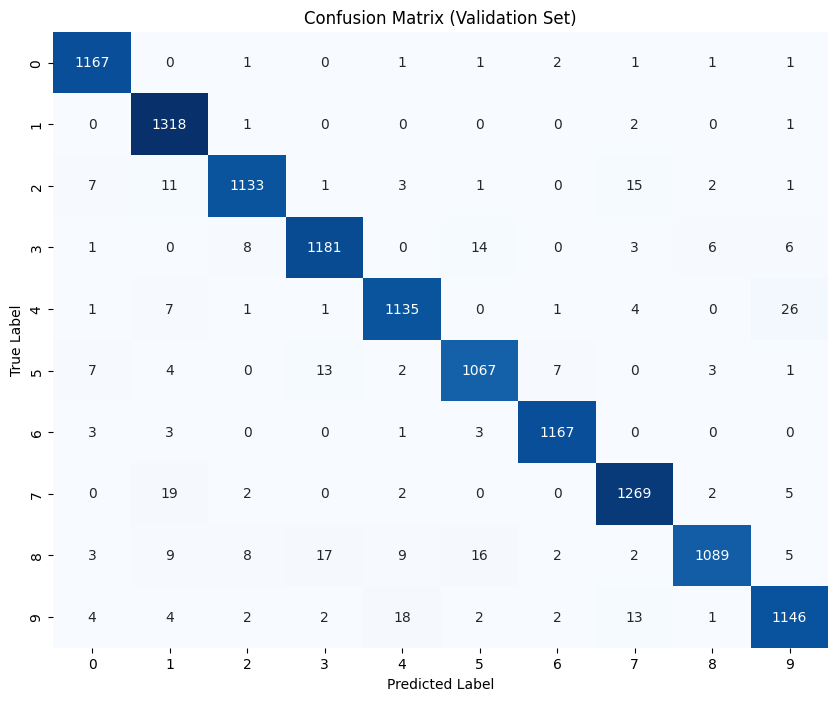

In [12]:
# Calculate confusion matrix
conf_matrix_validation = confusion_matrix(y_validation, y_validation_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_validation, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Validation Set)")
plt.show()